<a href="https://colab.research.google.com/github/FerrazThales/DepressionSymptosAnalysis/blob/main/An%C3%A1lise_Estat%C3%ADstica_dos_Sintomas_de_Depress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center"><b>Encontre eu e meus projetos nas redes sociais!</b></h1>
<table>
  <tr>
  <td><a href="https://thalesferraz.medium.com/">
  <img src="https://github.com/FerrazThales/FerrazThales/blob/main/logo_gif.gif?raw=true" width="900" title="Olá, Meu nome é Thales e sou cientista de Dados!"/>
  </a>
  </td>
  <td><a href="https://github.com/FerrazThales">
  <img hspace=30 vspace=110 src="https://github.com/FerrazThales/FerrazThales/blob/main/GitHub.jpg?raw=true" width="80%" title="Entre em meu Github e veja mais projetos!" /> 
  </a>
  </td>
  <td>
  <a href="https://thalesferraz.medium.com/default-prediction-prevendo-a-inadimpl%C3%AAncia-em-institui%C3%A7%C3%B5es-financeiras-f16ab7126381">
  <img vspace=110 src="https://github.com/FerrazThales/FerrazThales/blob/main/medium.png?raw=true" width="800" title="Veja este meu projeto no Medium!"/>
  </a>
  </td>
  <td><a href="https://www.linkedin.com/in/thalesdefreitasferraz/"><img vspace=150 src="https://github.com/FerrazThales/FerrazThales/blob/main/linkedin.png?raw=true" width="80%" title="Vamos trocar uma idéia sobre Data Science no LinkedIn?" />
  </a>
  </td>
  </tr>
</table>

# O que você vai ver nesta análise:

* Uma análise dos dados 
* A realização de testes de hipóteses através do pacote Scipy.
* A Anova de 1-fator
* O cálculo de intervalos de confiança utilizando Bootstraping.


explicar o questionário

texto explicando

In [126]:
#@title Clique aqui para ver os pacotes utilizados no projeto.

# instalando o pacote pingouin para utilizar a anova welch
!pip install pingouin 1>0

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew, kurtosis,shapiro,levene,ttest_ind
import pingouin as pg

# visualizar melhor os gráficos do projeto
%matplotlib inline

In [52]:
#@title Clique aqui para ver funções e listas auxiliares utilizadas no projeto.

# função que auxilia a calcular o score da depressão
def level(score):

  if score < 5:
    level = 'minimal'
  elif score >= 5 and score < 10:
    level = 'mild'
  elif score >= 10 and score < 15:
    level = 'moderate'
  elif score >= 15 and score < 20:
    level = 'moderately severe'
  else:
    level = 'severe depression'

  return level

# função para criar rótulos  -> https://thalesferraz.medium.com/como-fazer-gr%C3%A1ficos-rotulados-em-python-8d6d72006eaf
def rotulos(ax, y, distancia, titulo):
  ax.get_yaxis().set_visible(False)
  ax.set_frame_on(False)
  ax.tick_params(axis='both',colors='grey',length=0,labelsize=12)
  ax.set_title(titulo,loc='left',pad=30,fontdict={'fontsize':16},color='#474747')
  for i in range(len(y)):
        ax.text(i,y[i] + distancia,'{:,}'.format(int(y[i])).replace(',','.'),ha='center',fontsize=16,color='grey')


# lista com as perguntas e respostas do questionário
perguntas_questionarios = ['Nas últimas 2 semanas, com que frequência você se sentiu incomodado pelos seguintes problemas: pouco interesse ou prazer em fazer as coisas? Você diria...',
                           'Nas últimas 2 semanas, com que frequência você foi incomodado pelos seguintes problemas: sentindo-se para baixo, deprimido ou sem esperança?',
                           'Nas últimas 2 semanas, com que frequência você foi incomodado pelos seguintes problemas: dificuldade para adormecer ou permanecer dormindo ou dormir demais?',
                           'Nas últimas 2 semanas, com que frequência você foi incomodado pelos seguintes problemas: sentindo-se cansado ou com pouca energia?',
                           'Nas últimas 2 semanas, com que frequência você foi incomodado pelos seguintes problemas: falta de apetite ou alimentação excessiva?',
                           'Nas últimas 2 semanas, com que frequência você foi incomodado pelos seguintes problemas: sentiu-se mal consigo mesmo - ou que você é um fracasso ou decepcionou a si mesmo ou a sua família?',
                           'Nas últimas 2 semanas, com que frequência você foi incomodado pelos seguintes problemas: dificuldade para se concentrar em coisas, como ler jornal ou assistir TV?',
                           'Nas últimas 2 semanas, com que frequência você foi incomodado pelos seguintes problemas: mover-se ou falar tão devagar que outras pessoas poderiam ter notado? Ou o oposto - estar tão inquieto ou inquieto que tem se movimentado muito mais do que o normal?',
                           'Nas últimas 2 semanas, com que frequência você foi incomodado pelos seguintes problemas: Pensamentos de que seria melhor você morrer ou se machucar de alguma forma?']

# lista com as respostas padrão do questionário
respostas_questionarios = ['Nenhuma vez',
                           'Menos de uma semana',
                           'Uma semana ou mais',
                           'Quase todos os dias']

#1. Importando as Bases de Dados

In [53]:
# guardando o endereço das base de dados do github
base_01_path = "https://raw.githubusercontent.com/FerrazThales/DepressionSymptosAnalysis/main/DataBase/DEMO_PHQ.csv"
base_02_path = "https://raw.githubusercontent.com/FerrazThales/DepressionSymptosAnalysis/main/DataBase/PAG_HEI.csv"

# armazenando em uma variável
df = pd.read_csv(base_01_path), pd.read_csv(base_02_path)

# Print da quantidade de registro e de features
print('-'* 30)
for i in range(2):
  print('{}ª BASE DE DADOS'.format(i+1))
  print('Registros: {:,} - Features: {}'.format(df[i].shape[0], df[i].shape[1]))
print('-'* 30)

------------------------------
1ª BASE DE DADOS
Registros: 5,334 - Features: 15
2ª BASE DE DADOS
Registros: 9,424 - Features: 17
------------------------------


link para encontrar o dicionário das variáveis
Primeira base de dados: [link](https://wwwn.cdc.gov/nchs/nhanes/2005-2006/DPQ_D.htm)

#### Visualizando as bases de dados

In [54]:
# Visualizando as 3 primeiras entradas da primeira base de dados
df[0].head(3)

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,85,3,4,4.0
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0


In [55]:
# Visualizando as 3 primeiras entradas da segunda base de dados
df[1].head(3)

,SEQN,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
0,31128,NaN,NaN,3.083350,0.0,3.927008,5.000000,0.000000,5.000000,4.251329,0.000000,2.487572,6.911882,10.000000,0.818029,6.408092,47.887262
1,31129,285.450346,2.0,1.697761,0.0,3.731602,4.929186,0.527631,3.887809,4.693141,0.928562,3.740758,6.146441,7.274979,8.006457,0.000000,45.564326
2,31130,0.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Percebemos que temos algumas pessoas que aparecem na primeira e na segunda

## Agrupando as Bases de dados

In [56]:
# verificando se todos os valores da primeira base estão na segunda base de dados
# assert: caso dê erro, o código não irá ser executado
assert df[1].SEQN.isin(df[0].SEQN).sum() == df[0].shape[0]

# agrupando as duas bases de dados
df_new = pd.merge(df[0],df[1], how = 'inner')

# verificando a nova base de dados
print('Nova Base de Dados')
print('Linhas: {:,} - Colunas: {}'.format(df_new.shape[0], df_new.shape[1]))

df_new.head(3)

Nova Base de Dados
Linhas: 5,334 - Colunas: 31


,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,...,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696


In [57]:
# separando o nome das colunas que envolvem as perguntas
columns_name = df_new.columns[:10]
columns_name

Index(['SEQN', 'DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060',
       'DPQ070', 'DPQ080', 'DPQ090'],
      dtype='object')

In [58]:
# verificando valores nulos das perguntas
(df_new[columns_name[1:]].isnull().sum()).sort_values(ascending=False).to_frame('Quantidade de Nulos')

,Quantidade de Nulos
DPQ010,498
DPQ020,498
DPQ030,498
DPQ040,498
DPQ050,498
DPQ060,498
DPQ070,498
DPQ080,498
DPQ090,498


In [59]:
# Excluindo os valores nulos

# colocar a porcentagem que retirou do dataset
df_new.dropna(subset = columns_name[1:], inplace = True)
df_new.head(3)

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,...,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.217331,2.313900,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826


## Criando Novas Variáveis

In [60]:
# se recusou a responder será considerado como pontuação zero
df_new[columns_name[1:]] = df_new[columns_name[1:]].replace(7,0)

# não deu a resposta da pergunta será considerado como pontuação zero
df_new[columns_name[1:]] = df_new[columns_name[1:]].replace(9,0)

# criando o score do PHQ -9 -> https://www.youtube.com/watch?v=q8zvPF87nPc&t=65s
df_new['score'] = np.sum(df_new[columns_name[1:]], axis = 1)

# inserindo o estado de depressão e a severidade da depressão -> baseado em: https://pubmed.ncbi.nlm.nih.gov/11556941/
df_new['depression'] = np.where(df_new.score >= 10, 1, 0)
df_new['depression_level'] = [level(x) for x in df_new['score']] # estamos utilizando a função level criada no início do código

# retirando a resposta das perguntas e a coluna identificadora(SEQN)
df_new.drop(columns = ['SEQN'], inplace = True)

# visualizando a base de dados resultante
df_new.head(3)

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,...,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE,score,depression,depression_level
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,...,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899,0.0,0,minimal
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696,0.0,0,minimal
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826,0.0,0,minimal


## Renomeando as colunas de acordo com o dicionário dos dados

In [61]:
# verificando os nomes das colunas
df_new.columns

Index(['DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060', 'DPQ070',
       'DPQ080', 'DPQ090', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH1', 'DMDEDUC',
       'INDFMINC', 'PAG_MINW', 'ADHERENCE', 'HEI2015C1_TOTALVEG',
       'HEI2015C2_GREEN_AND_BEAN', 'HEI2015C3_TOTALFRUIT',
       'HEI2015C4_WHOLEFRUIT', 'HEI2015C5_WHOLEGRAIN', 'HEI2015C6_TOTALDAIRY',
       'HEI2015C7_TOTPROT', 'HEI2015C8_SEAPLANT_PROT', 'HEI2015C9_FATTYACID',
       'HEI2015C10_SODIUM', 'HEI2015C11_REFINEDGRAIN', 'HEI2015C12_SFAT',
       'HEI2015C13_ADDSUG', 'HEI2015_TOTAL_SCORE', 'score', 'depression',
       'depression_level'],
      dtype='object')

In [62]:
# criando uma lista com nome de colunas mais legíveis a análise
rename_columns = ['Q1 - Pouco Interesse','Q2 - Deprimido', 'Q3 - Insonia ou Sonolencia','Q4 - Cansaco','Q5 - Inapetencia ou Gula',
                  'Q6 - Decepcao','Q7 - Concentracao','Q8 - Lentidao ou Agitacao','Q9 - Automutilacao',
                  'Genero', 'Idade(anos)','Raça/Etnia','Escolaridade','Renda anual familiar (US$)',
                  'Atividade Aerobica (min)','Aderencia ao PAG','Vegetais','Verduras','Frutas','Frutas in Natura',
                  'Grao Integrais','Laticinios','Proteinas','Plantas Marinhas e Proteinas Vegetais','Acido-Graxo','Sodio','Graos refinados',
                  'Gordura saturada','Acucares','Score(HEI)','Score(PHQ-9)','Depressao','Depressao Level']

# renomeando o dataset
df_new.set_axis(rename_columns,axis=1,inplace=True)

# visualizando as 3 primeiras entradas do dataset
df_new.head(3).round(2)

,Q1 - Pouco Interesse,Q2 - Deprimido,Q3 - Insonia ou Sonolencia,Q4 - Cansaco,Q5 - Inapetencia ou Gula,Q6 - Decepcao,Q7 - Concentracao,Q8 - Lentidao ou Agitacao,Q9 - Automutilacao,Genero,...,Plantas Marinhas e Proteinas Vegetais,Acido-Graxo,Sodio,Graos refinados,Gordura saturada,Acucares,Score(HEI),Score(PHQ-9),Depressao,Depressao Level
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,...,2.05,0.68,2.30,9.51,0.44,3.92,35.55,0.0,0,minimal
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,0.00,2.05,7.37,8.89,8.19,9.10,63.55,0.0,0,minimal
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,1.27,2.96,0.00,5.63,5.86,5.88,42.89,0.0,0,minimal


## Tratando os últimos dados nulos

In [63]:
# verificando dados nulos
df_new.isnull().sum().sort_values(ascending=False)

Vegetais                                 99
Verduras                                 99
Frutas in Natura                         99
Grao Integrais                           99
Laticinios                               99
Proteinas                                99
Plantas Marinhas e Proteinas Vegetais    99
Acido-Graxo                              99
Sodio                                    99
Graos refinados                          99
Gordura saturada                         99
Acucares                                 99
Score(HEI)                               99
Frutas                                   99
Renda anual familiar (US$)               36
Score(PHQ-9)                              0
Depressao                                 0
Q1 - Pouco Interesse                      0
Q2 - Deprimido                            0
Aderencia ao PAG                          0
Atividade Aerobica (min)                  0
Escolaridade                              0
Raça/Etnia                      

In [64]:
# visualizando no dataset quais os valores estão nulos
df_new[df_new["Vegetais"].isnull()]

,Q1 - Pouco Interesse,Q2 - Deprimido,Q3 - Insonia ou Sonolencia,Q4 - Cansaco,Q5 - Inapetencia ou Gula,Q6 - Decepcao,Q7 - Concentracao,Q8 - Lentidao ou Agitacao,Q9 - Automutilacao,Genero,...,Plantas Marinhas e Proteinas Vegetais,Acido-Graxo,Sodio,Graos refinados,Gordura saturada,Acucares,Score(HEI),Score(PHQ-9),Depressao,Depressao Level
28,1.0,1.0,3.0,3.0,3.0,0.0,1.0,0.0,0.0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,1,moderate
68,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0,minimal
82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,minimal
117,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0,minimal
130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,minimal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5092,0.0,3.0,0.0,3.0,3.0,3.0,0.0,1.0,2.0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,1,moderately severe
5140,0.0,3.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,0,mild
5161,1.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0,mild
5214,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0,minimal


texto explicativo

In [65]:
# excluindo os dados nulos do questionário da segunda base de dados (ex: Laticínios -> NaN)
df_new.dropna(subset = ['Vegetais'], inplace =  True)

# inserindo a mediana dos valores onde a Renda Anual Familiar é Nula
df_new.fillna(df_new['Renda anual familiar (US$)'].median(),
              inplace = True)

# 2. Análise Exploratória dos Dados

In [66]:
# verificando a tipagem dos dados de nossas variáveis
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4737 entries, 1 to 5333
Data columns (total 33 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Q1 - Pouco Interesse                   4737 non-null   float64
 1   Q2 - Deprimido                         4737 non-null   float64
 2   Q3 - Insonia ou Sonolencia             4737 non-null   float64
 3   Q4 - Cansaco                           4737 non-null   float64
 4   Q5 - Inapetencia ou Gula               4737 non-null   float64
 5   Q6 - Decepcao                          4737 non-null   float64
 6   Q7 - Concentracao                      4737 non-null   float64
 7   Q8 - Lentidao ou Agitacao              4737 non-null   float64
 8   Q9 - Automutilacao                     4737 non-null   float64
 9   Genero                                 4737 non-null   int64  
 10  Idade(anos)                            4737 non-null   int64  
 11  Raça

texto -> conventer em variáveis categóricas

In [67]:
# separando as variáveis de perguntas
perguntas = ['Q1 - Pouco Interesse','Q2 - Deprimido', 'Q3 - Insonia ou Sonolencia','Q4 - Cansaco','Q5 - Inapetencia ou Gula',
                'Q6 - Decepcao','Q7 - Concentracao','Q8 - Lentidao ou Agitacao','Q9 - Automutilacao']

# separando as variáveis consideradas como categóricas
categoricas = ['Genero','Raça/Etnia','Escolaridade','Renda anual familiar (US$)',
                'Aderencia ao PAG','Depressao','Depressao Level']

# separando as variáveis que são consideradas numéricas através da função 'set'
numericas = list(set(df_new.columns).difference(categoricas,perguntas))

# Visualizando o resultado da separação
print('Quantidade de Variáveis:')
print('Numéricas: {} -  Categóricas: {} - Perguntas: {}'.format(len(numericas), len(categoricas),len(perguntas)))

Quantidade de Variáveis:
Numéricas: 17 -  Categóricas: 7 - Perguntas: 9


## Análise das Variáveis Numéricas

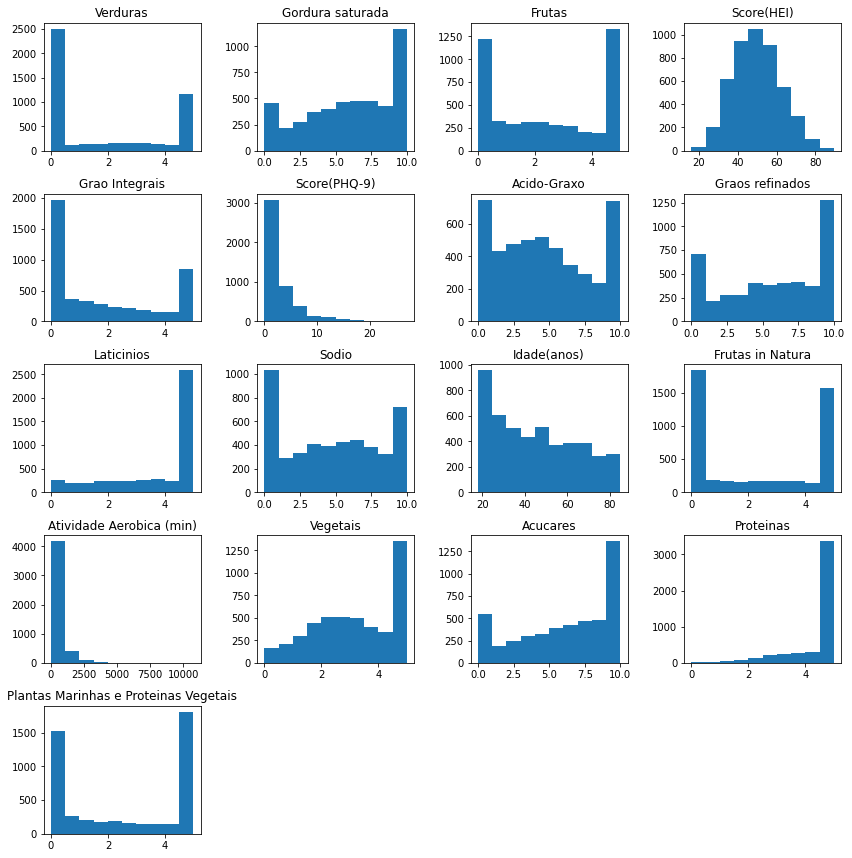

In [68]:
# histogramas das variáveis numéricas
df_new[numericas].hist(figsize = (12,12), grid=False)
plt.tight_layout(pad=1.0);

In [69]:
# verificar a Skew e Kurtosis de Cada Variável
for n in numericas:
  s = skew(df_new[n])
  k = kurtosis(df_new[n])
  print('Variável: {} | Skew: {:.2f} | Kurtosis: {:.2f}'.format(n,s,k))
  print('--'*35)
del n,s,k

Variável: Verduras | Skew: 0.58 | Kurtosis: -1.45
----------------------------------------------------------------------
Variável: Gordura saturada | Skew: -0.39 | Kurtosis: -0.99
----------------------------------------------------------------------
Variável: Frutas | Skew: 0.07 | Kurtosis: -1.56
----------------------------------------------------------------------
Variável: Score(HEI) | Skew: 0.23 | Kurtosis: -0.31
----------------------------------------------------------------------
Variável: Grao Integrais | Skew: 0.64 | Kurtosis: -1.15
----------------------------------------------------------------------
Variável: Score(PHQ-9) | Skew: 2.27 | Kurtosis: 6.41
----------------------------------------------------------------------
Variável: Acido-Graxo | Skew: 0.22 | Kurtosis: -1.12
----------------------------------------------------------------------
Variável: Graos refinados | Skew: -0.35 | Kurtosis: -1.20
----------------------------------------------------------------------
Var

In [70]:
# teste de shapiro para verificar a normalidade do índice Score(PHQ-9)
shapiro(df_new['Score(PHQ-9)'])

ShapiroResult(statistic=0.730928361415863, pvalue=0.0)

conclusões + análise das métricas descritivas.

In [71]:
# estatística descritiva das variáveis numéricas
df_new[numericas].describe().round(1)

,Verduras,Gordura saturada,Frutas,Score(HEI),Grao Integrais,Score(PHQ-9),Acido-Graxo,Graos refinados,Laticinios,Sodio,Idade(anos),Frutas in Natura,Atividade Aerobica (min),Vegetais,Acucares,Proteinas,Plantas Marinhas e Proteinas Vegetais
count,4737.0,4737.0,4737.0,4737.0,4737.0,4737.0,4737.0,4737.0,4737.0,4737.0,4737.0,4737.0,4737.0,4737.0,4737.0,4737.0,4737.0
mean,1.8,6.0,2.5,49.9,1.8,2.7,4.7,5.8,3.8,4.8,44.8,2.4,484.9,3.2,6.2,4.4,2.6
std,2.1,3.2,1.9,12.3,1.9,3.7,3.2,3.5,1.6,3.4,19.9,2.2,797.7,1.5,3.3,1.0,2.2
min,0.0,0.0,0.0,16.1,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,3.7,0.4,40.9,0.0,0.0,2.0,3.0,2.6,1.6,27.0,0.0,41.6,2.1,3.7,4.2,0.0
50%,0.0,6.4,2.3,49.5,1.0,1.0,4.4,6.2,4.9,4.8,43.0,2.1,221.7,3.2,6.8,5.0,2.6
75%,4.4,9.0,4.9,58.1,3.4,4.0,7.2,9.3,5.0,7.6,61.0,5.0,582.0,4.8,9.4,5.0,5.0
max,5.0,10.0,5.0,89.5,5.0,27.0,10.0,10.0,5.0,10.0,85.0,5.0,10777.8,5.0,10.0,5.0,5.0


conclusões

In [72]:
# Maximo de Atividade Aeróbica
atividade_aerobica_maxima = df_new['Atividade Aerobica (min)'].max()
print('Tempo em minutos em uma semana completa: {:,}'.format(24*7*60))
print('Tempo de atividade aeróbica máxima do dataset: {:,.2f}'.format(atividade_aerobica_maxima))

Tempo em minutos em uma semana completa: 10,080
Tempo de atividade aeróbica máxima do dataset: 10,777.83


texto

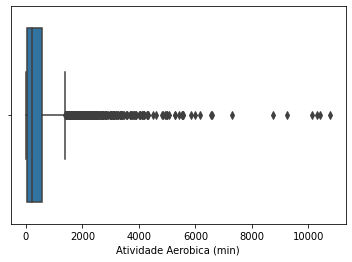

In [73]:
# visualizando os valores desta variável em um boxplot
sns.boxplot(x = df_new['Atividade Aerobica (min)']);

texto

In [74]:
# verificando quantas pessoas realizaram atividades maiores que 8000 minutos
maior_que_8000 = (df_new['Atividade Aerobica (min)'] > 8000).sum()
print('{} pessoas realizaram mais que 8.000 minutos de atividade aeróbicas em uma semana e serão retiradas do dataset'.format(maior_que_8000))

# retirando estas 6 pessoas do dataset
df_new = df_new[df_new['Atividade Aerobica (min)'] <= 8000]

6 pessoas realizaram mais que 8.000 minutos de atividade aeróbicas em uma semana e serão retiradas do dataset


## Análise das Perguntas

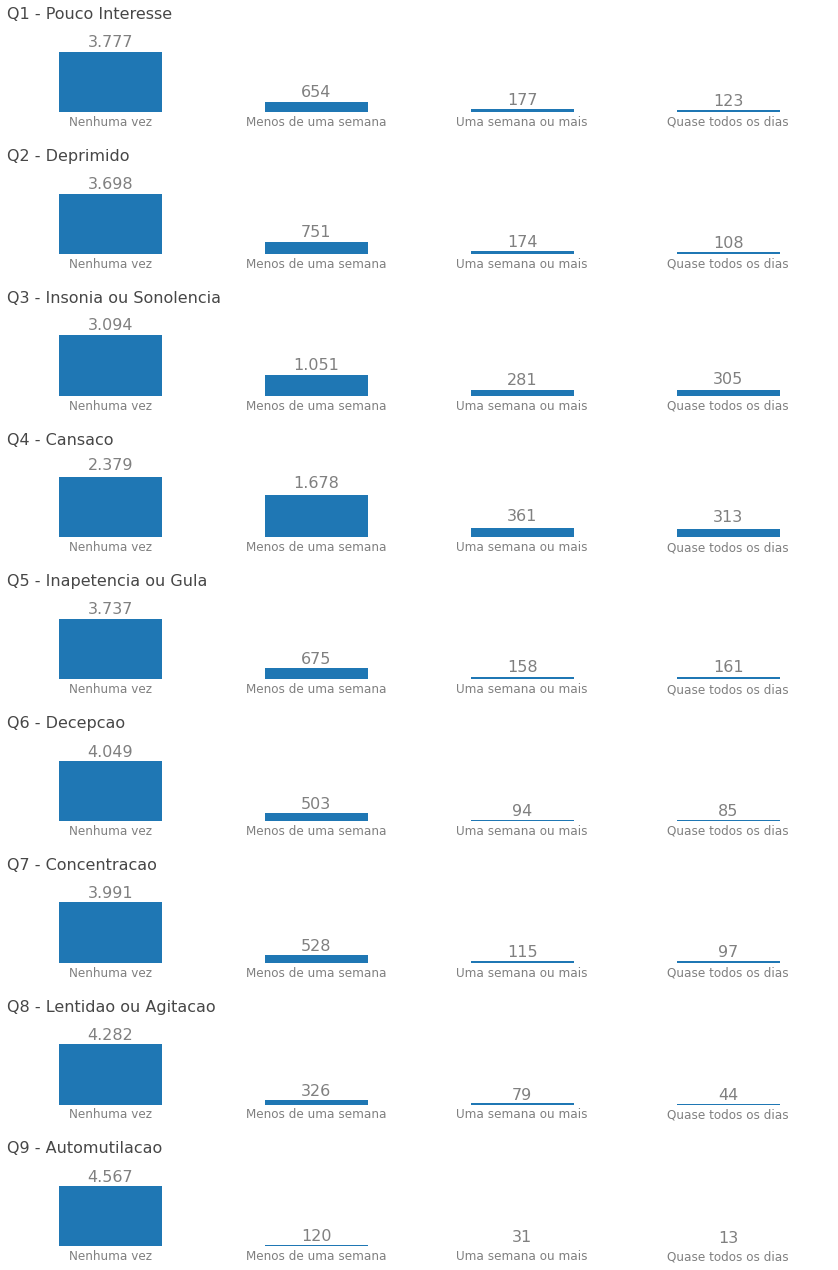

In [75]:
# criando a figure e o axis no matplotlib -> dúvidas? Acesse: https://thalesferraz.medium.com/como-fazer-gr%C3%A1ficos-rotulados-em-python-8d6d72006eaf
fig, ax = plt.subplots(figsize = (12,18), nrows = 9)

# Criando o gráfico para cada uma das perguntas realizadas no questionário
for i,f in enumerate(perguntas):
  df_new[f].value_counts().plot(kind='bar', ax = ax[i]);
  ax[i].set_xticklabels(respostas_questionarios,fontdict={'fontsize':12,'horizontalalignment':'center'},color='#6a6a6f',rotation=0)
  rotulos(ax =  ax[i], y = df_new[f].value_counts() , distancia = 300, titulo = f) # ver a função rotulos criada no início do código

# plotando o gráfico
plt.tight_layout(pad = 2.0);

del i,f

aparentemente pouca gente apresenta depressão

## Análise das Variáveis Categóricas

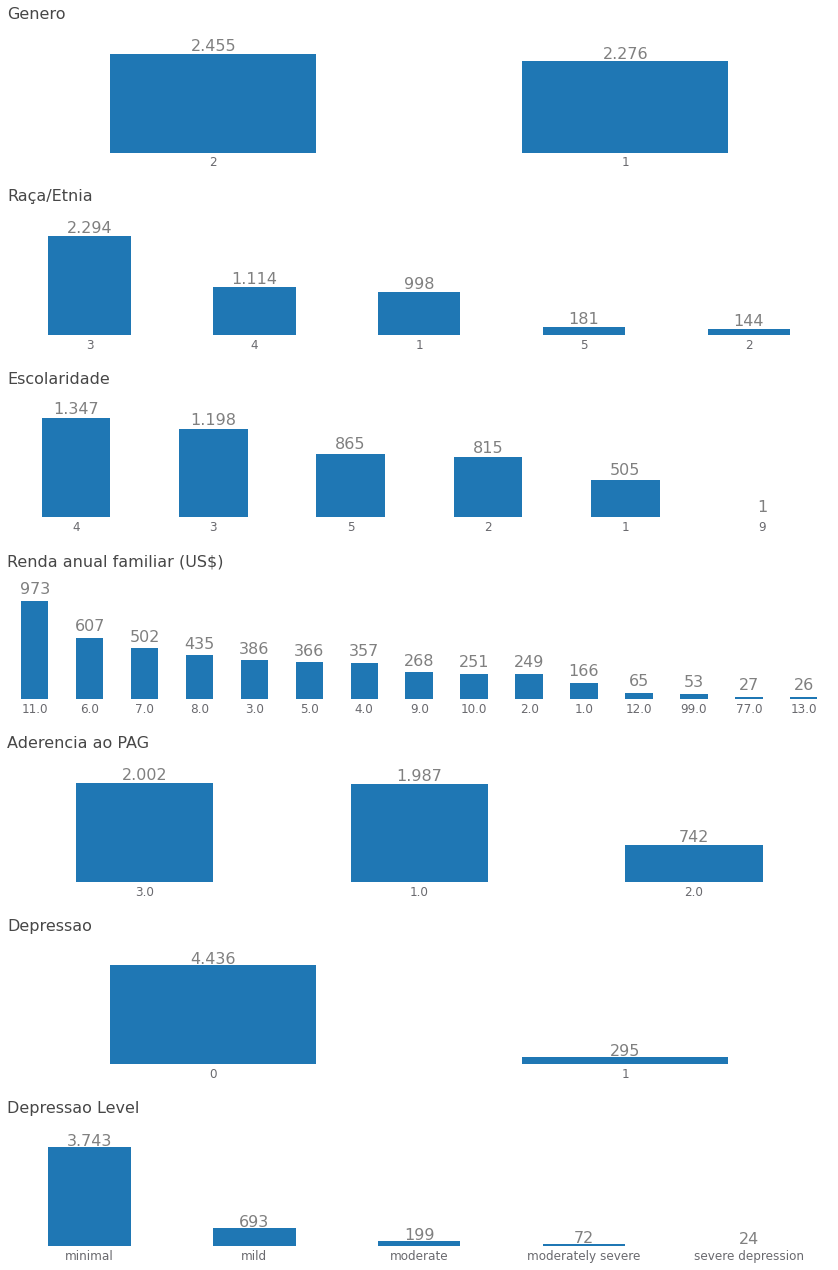

In [76]:
# criando a figure e o axis no matplotlib -> dúvidas? Acesse: https://thalesferraz.medium.com/como-fazer-gr%C3%A1ficos-rotulados-em-python-8d6d72006eaf
fig, ax = plt.subplots(figsize = (12,18), nrows = 7)

# criando o loop para cada uma das variáveis
for i,c in enumerate(categoricas):
  df_new[c].value_counts().sort_values(ascending=False).plot(kind='bar', ax = ax[i])
  rotulos(ax =  ax[i], y = list(df_new[c].value_counts()) , distancia = 70, titulo = c) # ver a função rotulos criada no início do código
  ax[i].set_xticklabels(df_new[c].value_counts().index,fontdict={'fontsize':12,'horizontalalignment':'center'},color='#6a6a6f',rotation=0)

# plotando os gráficos
plt.tight_layout(pad = 2.0);

del i,c

texto

## Análise das Variáveis com o PHQ-9

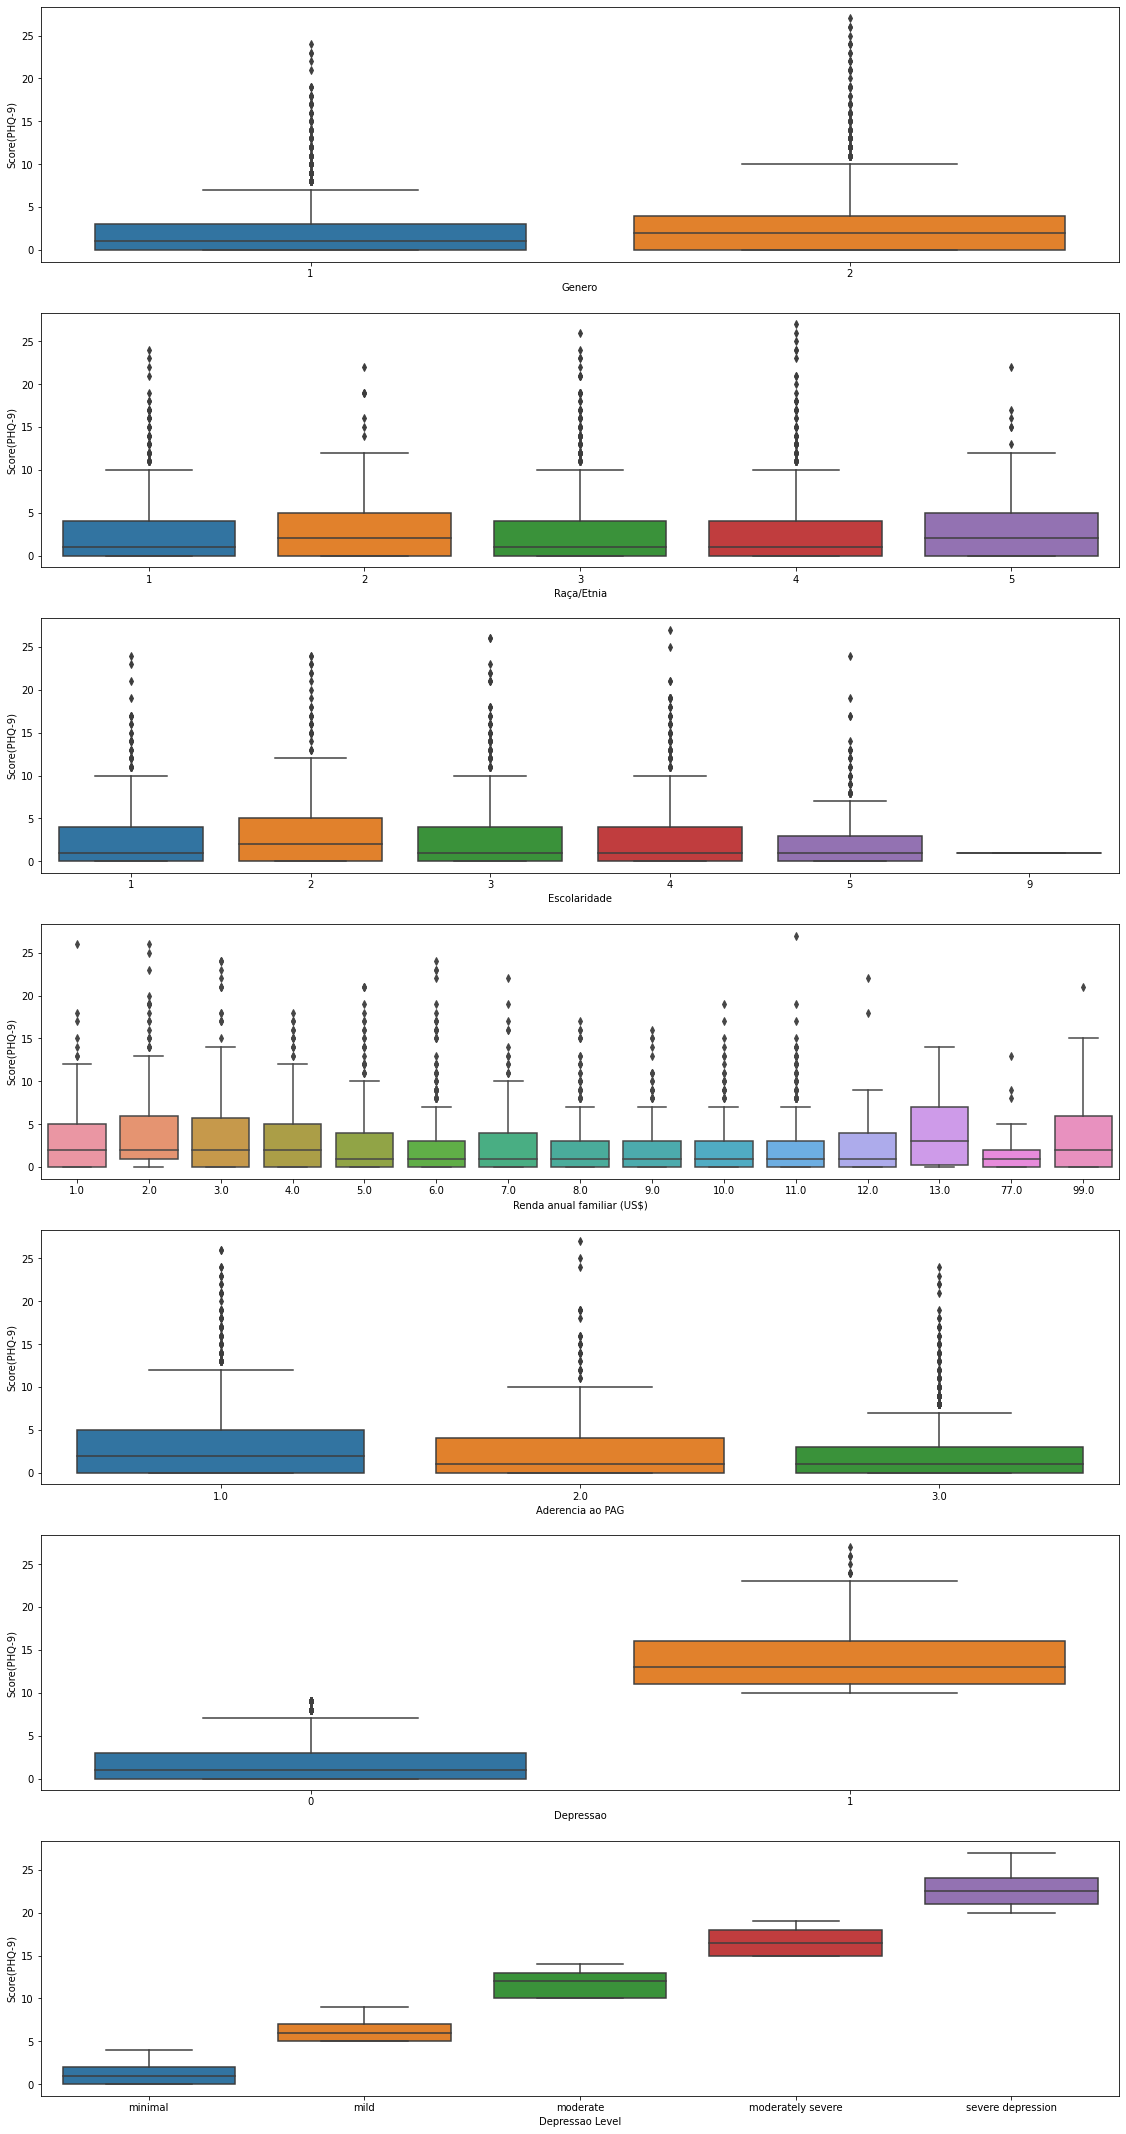

In [77]:
# criando a figure e o axis no matplotlib -> dúvidas? Acesse: https://thalesferraz.medium.com/como-fazer-gr%C3%A1ficos-rotulados-em-python-8d6d72006eaf
fig, ax = plt.subplots(figsize = (16,30), nrows = 7)

# verificando a relacao entre o score do PHQ-9 e as variáveis categoricas
for i,c in enumerate(categoricas):
  sns.boxplot(x = c, y = 'Score(PHQ-9)', data = df_new, ax = ax[i]);

# plotando os gráficos
plt.tight_layout(pad = 2.0);

del i,c

xxx

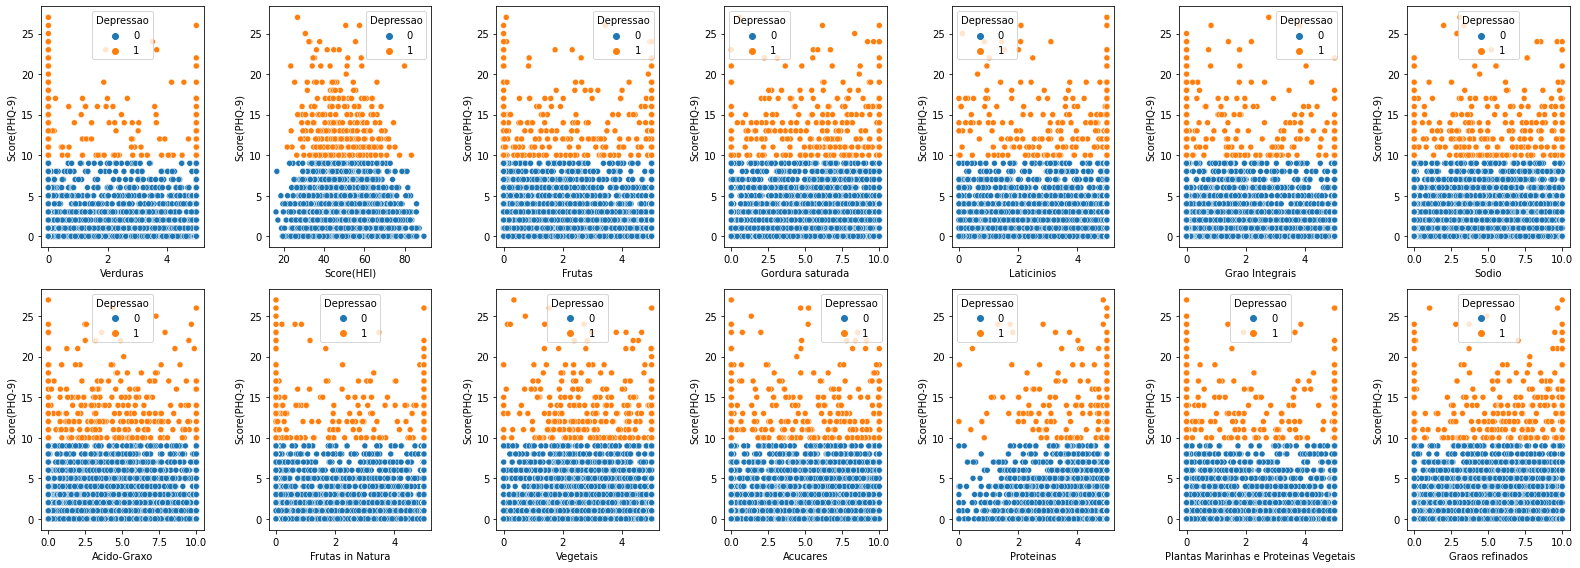

In [78]:
# criando a figure e o axis no matplotlib -> dúvidas? Acesse: https://thalesferraz.medium.com/como-fazer-gr%C3%A1ficos-rotulados-em-python-8d6d72006eaf
fig, ax = plt.subplots(figsize = (22,8), nrows = 2, ncols = 7)

# verificando a relacao entre o score do PHQ-9 e hábitos alimentares
alimentares = list(set(numericas) - set(['Score(PHQ-9)','Idade(anos)','Atividade Aerobica (min)'])) # criando uma lista apenas com as variáveis alimentares
for i in range(2):
  for j in range(7):
    a = alimentares[i*7 + j]
    sns.scatterplot(x = a, y = 'Score(PHQ-9)', hue = 'Depressao', data = df_new, ax = ax[i][j]);

# plotando os gráficos
plt.tight_layout();

del i,j,a

texto

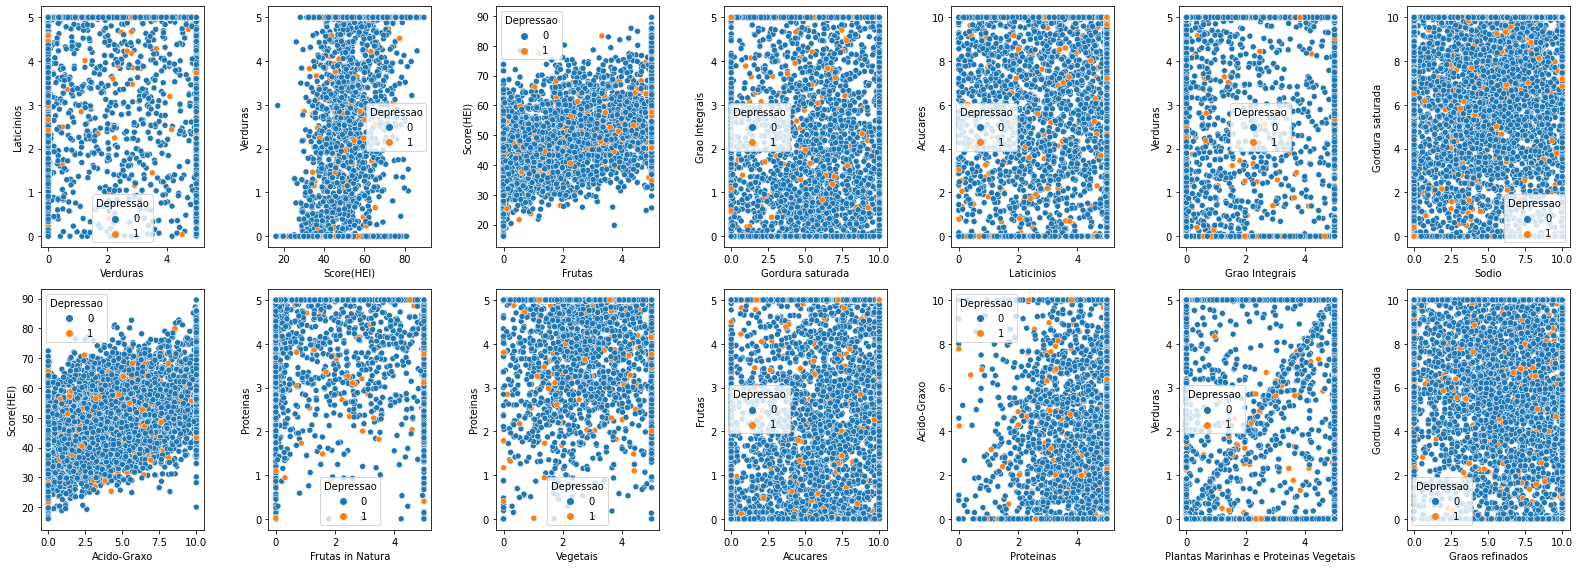

In [79]:
# tornando o notebook reprodutível com o seed
np.random.seed(43)

# criando a figure e o axis no matplotlib -> dúvidas? Acesse: https://thalesferraz.medium.com/como-fazer-gr%C3%A1ficos-rotulados-em-python-8d6d72006eaf
fig, ax = plt.subplots(figsize = (22,8), nrows = 2, ncols = 7)

# verificando a relação de hábitos alimentares entre si
alimentares = list(set(numericas) - set(['Score(PHQ-9)','Idade(anos)','Atividade Aerobica (min)'])) # criando uma lista apenas com as variáveis alimentares
for i in range(2):
  for j in range(7):
    a = i*7 + j
    b = np.random.randint(low = 0, high = 14) # numéro aleatório entre 0 e 13 para pegar um elemento da lista 'alimentares'
    sns.scatterplot(x = alimentares[a], y = alimentares[b], hue = 'Depressao', data = df_new, ax = ax[i][j]);

# plotando os gráficos
plt.tight_layout();

del i,j,a,b

texto

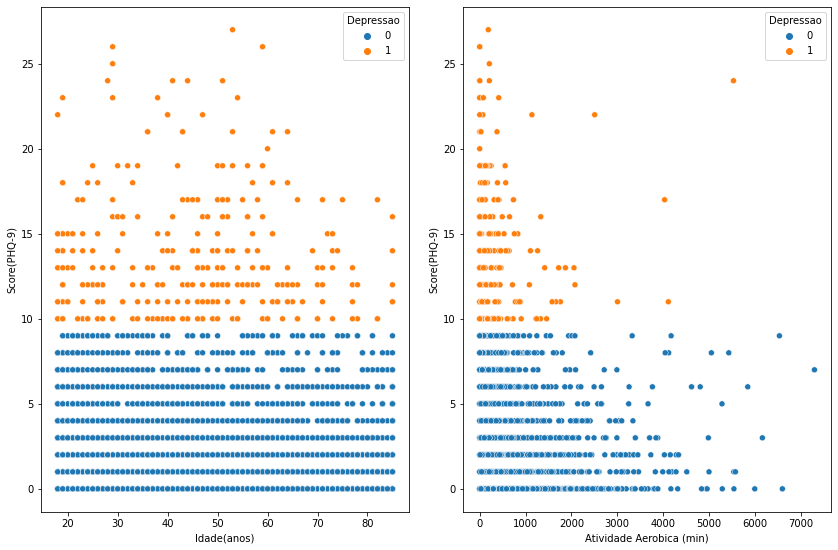

In [80]:
# criando a figure e o axis no matplotlib -> dúvidas? Acesse: https://thalesferraz.medium.com/como-fazer-gr%C3%A1ficos-rotulados-em-python-8d6d72006eaf
fig, ax = plt.subplots(figsize = (12,8),ncols = 2)

# criando os gráficos para comparação de Idade e de Atividade Aeróbica com o Score PHQ-9
sns.scatterplot(x = 'Idade(anos)', y = 'Score(PHQ-9)', hue= 'Depressao',data = df_new, ax = ax[0])
sns.scatterplot(x = 'Atividade Aerobica (min)', y = 'Score(PHQ-9)', hue= 'Depressao',data = df_new, ax = ax[1])

# plotar os gráficos
plt.tight_layout(pad = 2.0);

texto
observar atividade fisica e depressao

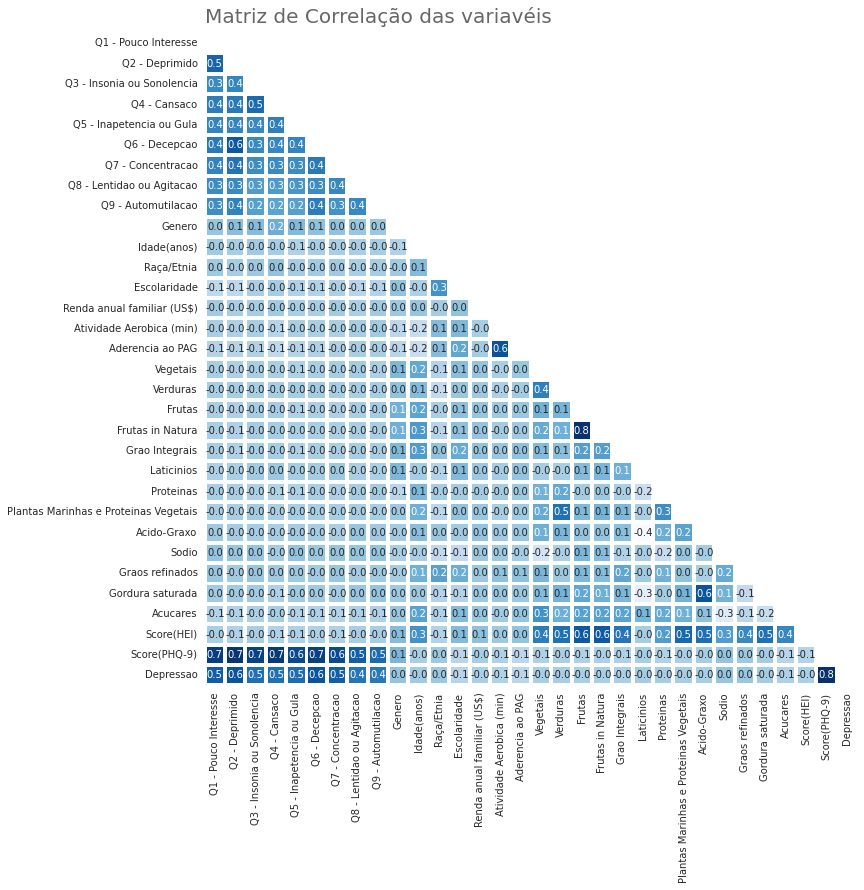

In [81]:
# criando a matriz de correlacao
matriz_de_correlacao = df_new.corr()

# criacao de uma mascara
mascara = np.zeros_like(matriz_de_correlacao)
mascara[np.triu_indices_from(mascara)] = True

# plotando o gráfico de correlação
with sns.axes_style('white'):
  fig,ax = plt.subplots(figsize=(16,12))
  sns.heatmap(matriz_de_correlacao,mask=mascara,square=True,annot=True,cmap='Blues',fmt='.1f',linewidths=3,ax=ax,cbar=False)
  ax.set_title('Matriz de Correlação das variavéis',loc='left',pad=10,fontdict={'fontsize':20},color='#666666')

texto

# 3. Realizando algumas análises através de testes de hipotéses.

* Qual o perfil de quem tem depressão? -> correlação com o index PHQ-9
* A alimentação está relacionada a depressão.
* Quantidade de Açúcar e Depressão.

escrever sobre este tópico

### Há alguma diferença significativa da média do índice de PHQ - 9 em relação ao gênero? Ou seja, a média das mulheres pode ser considerada maior que a dos homens?

* explicar o teste de hipótese utilizado

In [82]:
# verificando a quantidade de pessoas com depressão moderada de acordo com o gênero
df_new[df_new['Depressao'] == 1]['Genero'].value_counts()

2    175
1    120
Name: Genero, dtype: int64

In [83]:
# verificando a média do Score(PHQ-9) em relação ao gênero
df_new.groupby('Genero')['Score(PHQ-9)'].mean().round(2)

Genero
1    2.32
2    3.14
Name: Score(PHQ-9), dtype: float64

In [84]:
# quantidade de registros de cada amostra
df_new['Genero'].value_counts()

2    2455
1    2276
Name: Genero, dtype: int64

texto

In [85]:
# antes de realizarmos nosso teste de hipótese, temos que verificar se as variâncias são iguais utilizando o teste de levene
df_new.groupby('Genero')['Score(PHQ-9)'].var()

Genero
1    11.970212
2    15.611253
Name: Score(PHQ-9), dtype: float64

In [86]:
# separando o dataset entre os gêneros
masc = df_new[df_new['Genero'] == 1]['Score(PHQ-9)']
fem  = df_new[df_new['Genero'] == 2]['Score(PHQ-9)']

# realizando o teste de levene (escolhido devido a não-normalidade dos dados)
# https://towardsdatascience.com/levenes-test-for-equality-of-variances-explained-with-python-examples-f0445a19805f
levene(masc,fem)

LeveneResult(statistic=25.969684390663918, pvalue=3.6033363744774925e-07)

texto

In [87]:
# realizando o teste t
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

ttest_ind(a = fem, b = masc, equal_var=False,alternative='greater')

Ttest_indResult(statistic=7.612332061925396, pvalue=1.615786594273094e-14)

texto

### Há alguma diferença significativa da média do índice de PHQ - 9 em relação as etnias entrevistadas? (melhorar o texto)
* explicar o teste de hipótese utilizado

In [88]:
# verificando a média do score de cada amostra
df_new.groupby('Raça/Etnia')['Score(PHQ-9)'].mean()

Raça/Etnia
1    2.749499
2    3.437500
3    2.603313
4    2.903950
5    2.911602
Name: Score(PHQ-9), dtype: float64

In [89]:
# quantidade de registros de cada amostra
df_new['Raça/Etnia'].value_counts()

3    2294
4    1114
1     998
5     181
2     144
Name: Raça/Etnia, dtype: int64

texto -> anova

Seus dados de amostra cada grupo tem mais de 20 observações.

In [90]:
# separando os grupos
grupo_01 = df_new[df_new['Raça/Etnia'] == 1]['Score(PHQ-9)']
grupo_02 = df_new[df_new['Raça/Etnia'] == 2]['Score(PHQ-9)']
grupo_03 = df_new[df_new['Raça/Etnia'] == 3]['Score(PHQ-9)']
grupo_04 = df_new[df_new['Raça/Etnia'] == 4]['Score(PHQ-9)']
grupo_05 = df_new[df_new['Raça/Etnia'] == 5]['Score(PHQ-9)']

# aplicando no teste de levene
levene(grupo_01, grupo_02,grupo_03, grupo_04, grupo_05)

LeveneResult(statistic=2.5755679576441888, pvalue=0.03576748669625215)

texto explicando

In [91]:
#
py.welch_anova(dv = 'Score(PHQ-9)', between = 'Raça/Etnia', data = df_new)

,Source,ddof1,ddof2,F,p-unc,np2
0,Raça/Etnia,4,608.836217,2.30289,0.05728,0.002235


texto explicando -> ver a aula da prof

### Há alguma diferença significativa da média do índice de PHQ - 9 em relação a renda anual familiar? (melhorar texto)

In [92]:
# verificando a média do score de cada amostra
df_new.groupby('Renda anual familiar (US$)')['Score(PHQ-9)'].mean()

Renda anual familiar (US$)
1.0     3.246988
2.0     4.224900
3.0     3.878238
4.0     3.324930
5.0     3.095628
6.0     2.545305
7.0     2.458167
8.0     2.347126
9.0     2.227612
10.0    2.490040
11.0    2.065776
12.0    2.692308
13.0    4.346154
77.0    2.111111
99.0    3.547170
Name: Score(PHQ-9), dtype: float64

In [93]:
# quantidade de registros de cada amostra
df_new['Renda anual familiar (US$)'].value_counts()

11.0    973
6.0     607
7.0     502
8.0     435
3.0     386
5.0     366
4.0     357
9.0     268
10.0    251
2.0     249
1.0     166
12.0     65
99.0     53
77.0     27
13.0     26
Name: Renda anual familiar (US$), dtype: int64

In [94]:
# separando os grupos
grupo_01 = df_new[df_new['Renda anual familiar (US$)'] == 1]['Score(PHQ-9)']
grupo_02 = df_new[df_new['Renda anual familiar (US$)'] == 2]['Score(PHQ-9)']
grupo_03 = df_new[df_new['Renda anual familiar (US$)'] == 3]['Score(PHQ-9)']
grupo_04 = df_new[df_new['Renda anual familiar (US$)'] == 4]['Score(PHQ-9)']
grupo_05 = df_new[df_new['Renda anual familiar (US$)'] == 5]['Score(PHQ-9)']
grupo_06 = df_new[df_new['Renda anual familiar (US$)'] == 6]['Score(PHQ-9)']
grupo_07 = df_new[df_new['Renda anual familiar (US$)'] == 7]['Score(PHQ-9)']
grupo_08 = df_new[df_new['Renda anual familiar (US$)'] == 8]['Score(PHQ-9)']
grupo_09 = df_new[df_new['Renda anual familiar (US$)'] == 9]['Score(PHQ-9)']
grupo_10 = df_new[df_new['Renda anual familiar (US$)'] == 10]['Score(PHQ-9)']
grupo_11 = df_new[df_new['Renda anual familiar (US$)'] == 11]['Score(PHQ-9)']
grupo_12 = df_new[df_new['Renda anual familiar (US$)'] == 12]['Score(PHQ-9)']
grupo_13 = df_new[df_new['Renda anual familiar (US$)'] == 13]['Score(PHQ-9)']
grupo_77 = df_new[df_new['Renda anual familiar (US$)'] == 77]['Score(PHQ-9)']
grupo_99 = df_new[df_new['Renda anual familiar (US$)'] == 99]['Score(PHQ-9)']

# realizando o teste de levene (escolhido devido a não-normalidade dos dados)
# https://towardsdatascience.com/levenes-test-for-equality-of-variances-explained-with-python-examples-f0445a19805f
levene(grupo_01,grupo_02,grupo_03,grupo_04,grupo_05,grupo_06,grupo_07,grupo_08,grupo_09,grupo_10,grupo_11,grupo_12,grupo_13,grupo_77,grupo_99)

LeveneResult(statistic=8.744960326838626, pvalue=3.970537265153301e-19)

texto

In [109]:
# 
pg.welch_anova(dv = 'Score(PHQ-9)', between = 'Renda anual familiar (US$)', data = df_new)

,Source,ddof1,ddof2,F,p-unc,np2
0,Renda anual familiar (US$),14,530.044955,8.369886,2.092383e-16,0.030616


texto

**Teste Post Hoc**

In [108]:
# aplicando o teste não paramétrico Games Howell
df_gh = pg.pairwise_gameshowell(dv = 'Score(PHQ-9)', between = 'Renda anual familiar (US$)', data = df_new)
# o pg.pairwise_gameshowell retorna um Pandas DataFrame
df_gh[df_gh['pval'] <= 0.05]

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
9,1.0,11.0,3.246988,2.065776,1.181212,0.337230,3.502689,192.417433,4.082530e-02,0.381342
17,2.0,6.0,4.224900,2.545305,1.679595,0.368944,4.552441,352.212654,7.008483e-04,0.395229
18,2.0,7.0,4.224900,2.458167,1.766732,0.364667,4.844776,336.715285,1.913835e-04,0.441867
19,2.0,8.0,4.224900,2.347126,1.877773,0.368478,5.096027,348.415577,5.740485e-05,0.461993
20,2.0,9.0,4.224900,2.227612,1.997288,0.383923,5.202311,387.240869,3.245026e-05,0.465913
21,2.0,10.0,4.224900,2.490040,1.734860,0.395214,4.389670,412.724454,1.356523e-03,0.392739
22,2.0,11.0,4.224900,2.065776,2.159124,0.348932,6.187806,286.069832,2.193730e-07,0.615234
29,3.0,6.0,3.878238,2.545305,1.332934,0.288943,4.613144,669.238383,4.632234e-04,0.317739
30,3.0,7.0,3.878238,2.458167,1.420071,0.283462,5.009741,625.049159,7.160050e-05,0.357350
31,3.0,8.0,3.878238,2.347126,1.531112,0.288347,5.309955,644.845810,1.547786e-05,0.380173


texto

### Há alguma diferença significativa da média do índice de PHQ - 9 em relação aos idosos? (melhorar texto)

[link](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4282767/#:~:text=Ageing%2C%20an%20inevitable%20process%2C%20is,referred%20to%20as%20%27elderly%27.)

In [46]:
# criando a variável idoso no dataset
# a idade para ser considerado idoso nos EUA foi retirada deste artigo -> https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4282767/#:~:text=Ageing%2C%20an%20inevitable%20process%2C%20is,referred%20to%20as%20%27elderly%27.
df_new['Idoso'] = np.where(df_new['Idade(anos)'] >= 65, 1 ,0)

# verificando a quantidade de idosos
df_new['Idoso'].value_counts()

0    3762
1     969
Name: Idoso, dtype: int64

In [47]:
# verificando a média do SCORE PHQ-9 em relação aos idosos
df_new.groupby('Idoso')['Score(PHQ-9)'].mean()

Idoso
0    2.864700
1    2.266254
Name: Score(PHQ-9), dtype: float64

texto

In [48]:
# separando o dataset entre os gêneros
idoso = df_new[df_new['Idoso'] == 1]['Score(PHQ-9)']
nao_idoso  = df_new[df_new['Idoso'] == 0]['Score(PHQ-9)']

# realizando o teste de levene (escolhido devido a não-normalidade dos dados)
# https://towardsdatascience.com/levenes-test-for-equality-of-variances-explained-with-python-examples-f0445a19805f
levene(idoso,nao_idoso)

LeveneResult(statistic=19.08489768736886, pvalue=1.2770682360492525e-05)

texto

In [49]:
# realizando o teste t
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

ttest_ind(a = idoso, b = nao_idoso, equal_var=False, alternative = 'less')

Ttest_indResult(statistic=-5.074142996719469, pvalue=2.1431182545759139e-07)

#### Comparando através de Intervalos de Confiança

texto falando que vamos usar bootstrap

In [125]:
# calculando os intervalos de confiança para idososo e não idosos ao nível de confiança 95%
# https://towardsdatascience.com/how-to-calculate-confidence-intervals-in-python-a8625a48e62b

# gerando amostras aleatórias com reposição e calculando as médias
values_idoso = [np.random.choice(idoso, size = len(idoso), replace = True).mean() for i in range(1000)]
values_nao_idoso = [np.random.choice(nao_idoso, size = len(nao_idoso), replace = True).mean() for i in range(1000)]

# calculando o percentil
percentil_idoso = np.percentile(values_idoso, [0.025, 0.95])
percentil_nao_idoso = np.percentile(values_nao_idoso, [0.025, 0.95])

print('Com 95% de confiança o valor esperado do índice PHQ-9 para idoso é de : {:.2f} - {:.2f}'.format(percentil_idoso[0], percentil_idoso[1]))
print('Com 95% de confiança o valor esperado do índice PHQ-9 para não-idoso é de : {:.2f} - {:.2f}'.format(percentil_nao_idoso[0], percentil_nao_idoso[1]))

Com 95% de confiança o valor esperado do índice PHQ-9 para idoso é de : 1.93 - 2.03
Com 95% de confiança o valor esperado do índice PHQ-9 para não-idoso é de : 2.67 - 2.71


texto

## Fazer um teste usando o qui-quadrado

# 4. Referências

* [The PHQ-9: validity of a brief depression severity measure](https://pubmed.ncbi.nlm.nih.gov/11556941/)

* [Sensibilidade e especificidade do Patient Health Questionnaire-9 (PHQ-9) entre adultos da população geral](https://scielosp.org/article/csp/2013.v29n8/1533-1543/pt/)

* [Curso de Estatística do Básico ao Avançado -  Profª Renata Biaggi](https://www.renatabiaggi.com/)